# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom
Lab Number: 1

# Business Understanding - 10 pts
<Describe Data Here>

# Data Understanding - 80 pts
<Use Subsections as defined below>

In [28]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

# NOTE: To use the Kaggle API perform the following steps:
# -- pip install kaggle
# -- create a kaggle account
# -- under the kaggle user profile generate the API token (kaggle.json) and download to the local machine
# -- for windows the file should be located in C:\Users\<Username>\.kaggle\kaggle.json
# -- for Mac/Linus the file should be located in ~/.kaggle/kaggle.json
#from kaggle.api.kaggle_api_extended import KaggleApi

#api = KaggleApi()
#api.authenticate()

In [2]:
# Load data into dataframe
df = pd.read_csv('F:/SMU/DS7331/Project01/us-accidents.zip')
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.727177e+06,2.243939e+06,2.243939e+06,2.243939e+06,516762.000000,516762.000000,2.243939e+06,785537.000000,2.181674e+06,391569.000000,2.179472e+06,2.186659e+06,2.172579e+06,1.800985e+06,264473.000000
mean,2.073527e+02,2.382692e+00,3.646348e+01,-9.485567e+01,37.443109,-96.527543,2.879095e-01,5625.281008,6.123244e+01,26.042067,6.592758e+01,3.003747e+01,9.124096e+00,8.844042e+00,0.060439
std,1.940527e+01,5.488029e-01,4.958759e+00,1.709453e+01,5.126585,17.986406,1.532341e+00,11071.872897,1.914616e+01,13.478333,2.243013e+01,2.267242e-01,2.986359e+00,4.973200e+00,0.439698
min,2.000000e+02,0.000000e+00,2.457022e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,1.000000,-7.780000e+01,-65.900000,4.000000e+00,0.000000e+00,0.000000e+00,1.200000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.348468e+01,-1.171362e+02,33.887450,-117.870577,0.000000e+00,803.000000,4.890000e+01,19.200000,5.000000e+01,2.992000e+01,1.000000e+01,5.800000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.586428e+01,-8.818469e+01,38.038480,-90.192310,0.000000e+00,2672.000000,6.300000e+01,28.700000,6.800000e+01,3.003000e+01,1.000000e+01,8.100000e+00,0.010000
75%,2.010000e+02,3.000000e+00,4.042111e+01,-8.085453e+01,41.393320,-80.895040,1.000000e-02,6846.000000,7.590000e+01,36.400000,8.500000e+01,3.015000e+01,1.000000e+01,1.150000e+01,0.040000
max,4.060000e+02,4.000000e+00,4.900076e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,961052.000000,1.706000e+02,45.200000,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,10.800000


In [3]:
# Check the header of the data file (49 columns)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# view additional data set detail
print (df.dtypes)
print (df.info())

# View number of rows and columns
df.shape

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

(2243939, 49)

In [7]:
# Finding the null values.
print(df.isnull().sum())

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

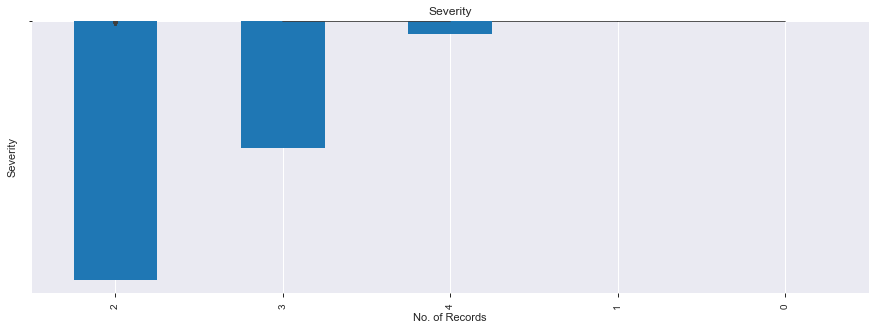

In [33]:
# Severity boxplot
sns.boxplot(x=df["Severity"])

# Severity Histogram
df.Severity.value_counts().nlargest(1000000).plot(kind="bar", figsize=(15,5))
plt.title('Severity')
plt.ylabel('Severity')
plt.xlabel('No. of Records');

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
TMC,1.000000,0.170315,-0.001167,-0.023288,NaN,NaN,0.032074,0.031750,0.000276,0.011299,...,0.022141,0.031004,-0.001705,-0.009201,-0.001900,-0.011855,-0.017259,-0.001852,-0.057323,NaN
Severity,0.170315,1.000000,0.054334,0.024901,0.031422,0.185499,0.136822,0.039837,-0.033450,-0.057694,...,-0.005312,0.062770,-0.004208,-0.022700,-0.004192,-0.043621,-0.046646,-0.007316,-0.197374,NaN
Start_Lat,-0.001167,0.054334,1.000000,0.004586,0.999993,-0.068925,0.073028,0.039416,-0.429880,-0.291203,...,-0.003778,0.032553,-0.005604,-0.000506,0.000336,-0.002701,0.022025,0.011873,-0.088405,NaN
Start_Lng,-0.023288,0.024901,0.004586,1.000000,-0.068886,0.999999,0.037884,-0.227586,-0.088828,-0.098005,...,0.014891,-0.051134,-0.003014,-0.028274,-0.000167,-0.016076,-0.029736,-0.007225,0.075855,NaN
End_Lat,NaN,0.031422,0.999993,-0.068886,1.000000,-0.068887,0.034728,0.191842,-0.450890,-0.180705,...,-0.001590,-0.066467,-0.026090,0.010252,0.002375,-0.002416,0.019053,0.003550,-0.055156,NaN
End_Lng,NaN,0.185499,-0.068925,0.999999,-0.068887,1.000000,0.043927,-0.300646,-0.044418,-0.127565,...,0.016611,0.014352,0.004605,-0.015866,-0.000286,0.016171,-0.016475,-0.000296,0.078865,NaN
Distance(mi),0.032074,0.136822,0.073028,0.037884,0.034728,0.043927,1.000000,0.065295,-0.051803,-0.052744,...,-0.003188,0.039494,-0.003002,-0.011910,-0.001347,-0.020186,-0.008485,-0.002062,-0.068634,NaN
Number,0.031750,0.039837,0.039416,-0.227586,0.191842,-0.300646,0.065295,1.000000,-0.016938,0.018068,...,-0.001706,-0.009194,-0.005681,-0.015053,-0.001450,-0.025296,0.005811,-0.002095,-0.049251,NaN
Temperature(F),0.000276,-0.033450,-0.429880,-0.088828,-0.450890,-0.044418,-0.051803,-0.016938,1.000000,0.981223,...,0.000577,-0.004631,0.004673,0.005008,-0.000410,0.010284,-0.005362,-0.001569,0.052522,NaN
Wind_Chill(F),0.011299,-0.057694,-0.291203,-0.098005,-0.180705,-0.127565,-0.052744,0.018068,0.981223,1.000000,...,0.002802,-0.015978,0.003200,0.016378,0.002035,0.004320,0.009217,0.004906,0.028700,NaN


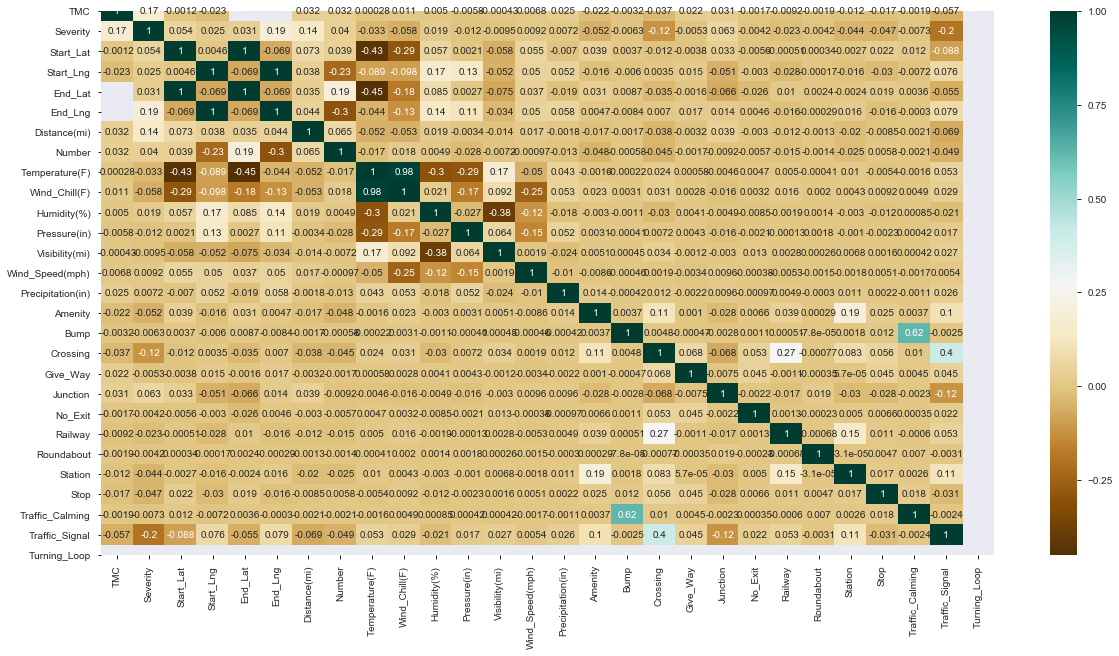

In [34]:
# Severity heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

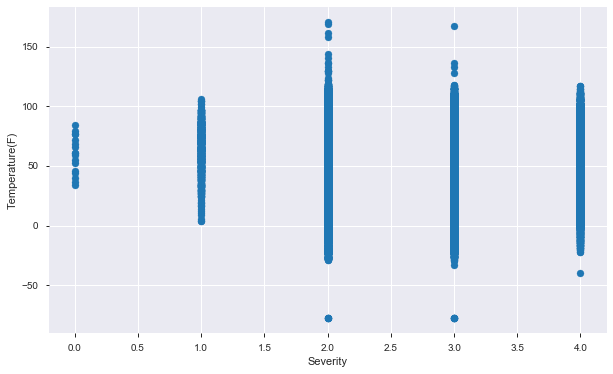

In [36]:
# Severity scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Severity'], df['Temperature(F)'])
ax.set_xlabel('Severity')
ax.set_ylabel('Temperature(F)')
plt.show()

In [ ]:
# view the data using pandas-profile
# profile = df.profile_report(title = "US Accident Dataset", correlations={
    #"pearson": False,
    #"spearman": False,
    #"kendall": False,
    #"phi_k": False,
    #"cramers": False,
    #"recoded":False,}
#)

## Data Meaning - 10 pts

## Data Quality - 15 pts

## Sample Statistics - 10 pts

## Visualizations - 15 pts

## Attribute Relationships - 15 pts

## Relationship Exploration - 10 pts

## Other Features - 5 pts

## Exceptional Work - 10 pts